# Los Angeles and San Diego Counties Housing Market Analysis <a id="home"></a>

## Table of Contents: 

- [Objectives](#1)
 - [Data Source](#1.1)
- [Loading and Preprocessing of Data](#2)
 - [Cleaning Data](#2.1)
 - [Bootstrapping for sample means](#2.2)
- [Descriptive Summary](#summary)
 - [Chi2-Square Test](#chisq-test)
- [Descriptive Summay Figures](#summary-figs)
- [Welch's t-test](#welch-ttest)
- [Results](#results)


<p style='text-align: right;'><a href=#home>Home</a></p>
 
### Objectives <a id='1'></a> 
Within the past 5 years (between Jan 2015 - Dec 2019)
1. Do houses in Los Angeles County stay longer on the market than SD County?
    - H0 = Time on Market (LA) is the same as Time on Market (SD)
1. Do houses on the market for longer period sold for lower prices within Los Angeles County? And within SD County?
    - H0 = Price Cut Ratio is different between long Time on Market (60) vs short Time on Market

**Price Cut Ratios (Closing Price lower than Listing Price)**
$$\text{PriceDiffRatio} = \frac{(ClosePrice-ListPrice)}{ListPrice}$$

**On Market Days (The number of days between 'OnMarketDate' and 'CloseDate'**

#### California Regional Multiple Listing Services (CRMLS) <a id='1.1'></a>
Real Estate Market Analysis using houses (single family residentials and townhouses) sold between January 2015 and 
December 2019 in the Los Angeles Counties and San Diego Counties from the CRMLS.

<p style='text-align: right;'><a href=#home>Home</a></p>

### Loading and Preprocessing <a id='2'></a>
Import relevant libraries and scripts; Set figure styles.

In [1]:
import os
import csv
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

from codes.data_cleaning import compile_csv, data_preprocessing, CLT_bootstrap
from codes.stat_testing import chi2_contingency, welch_test
from codes.sns_fig_gen import distplot, barplot, boxplot, violinplot, scatterplot

## Setting the Figure parameters, titles for Figures.
%matplotlib inline
rc = {
    'grid.color': '.8',
    'grid.linestyle': '--',
    }
sns.set(style='darkgrid',rc=rc)
titles = {'OnMarketDays':'Time on Market (Days)', 
          'ClosePrice':'Close Price ($ millions)', 
          'ListPrice':'List Price ($ millions)',
          'PriceDiffRatio':'Price Cut Ratio'}
columns = ['OnMarketDays','PriceDiffRatio'] # Columns from dataset as variables.

## Identifying the path for project and data folders.
proj_path = os.getcwd() # assumes in the top-most project folder
data_path = os.path.join(proj_path, 'data')

Run the below cell to create a "cleaned_data.csv"

In [2]:
# from codes.data_cleaning import compile_csv, data_preprocessing

# mls_df = compile_csv()
# mls_df = data_preprocessing(mls_df)
# mls_df.drop(['Matrix_Unique_ID'],axis=1)
# mls_df.to_csv(os.path.join(data_path,'cleaned_data.csv'),sep=',',
#                   quoting=csv.QUOTE_MINIMAL, header=mls_df.columns, index=False)

#### Load the "cleaned_data.csv"<a id="2.1"></a>

In [3]:
df_path = os.path.join(data_path,'cleaned_data.csv')
mls_df = pd.read_csv(df_path, header=0, low_memory=False)
# mls_df.info()
# display(mls_df.head())
# display(mls_df.tail())

Scaling the data for easier readability.

In [4]:
mls_df.ClosePrice = mls_df.ClosePrice/1e6
mls_df.ListPrice = mls_df.ListPrice/1e6
mls_df.PriceDifference = mls_df.PriceDifference/1e6

**Seperating into individual DataFrame for LA and SD**

In [5]:
LA = mls_df[mls_df.CountyOrParish == 'Los Angeles']
SD = mls_df[mls_df.CountyOrParish == 'San Diego']
LA_LongOnMarket = LA[LA.SixtyDays == '> 60 days']
SD_LongOnMarket = SD[SD.SixtyDays == '> 60 days']
LA_ShortOnMarket = LA[LA.SixtyDays == '< 60 days']
SD_ShortOnMarket = SD[SD.SixtyDays == '< 60 days']

#### Bootstrapped Sample Means <a id="2.2"></a>
Central Limit Theorem (Sample Means from Bootstrapping 1000 samples 200 times) to obtain Population Means and use normal distribution to test the hypothesis of mean differences.

In [6]:
n_times = 200
LA_means = CLT_bootstrap(LA, n_times)
SD_means = CLT_bootstrap(SD, n_times)
LA_LoM_means = CLT_bootstrap(LA_LongOnMarket, n_times)
SD_LoM_means = CLT_bootstrap(SD_LongOnMarket, n_times)
LA_SoM_means = CLT_bootstrap(LA_ShortOnMarket, n_times)
SD_SoM_means = CLT_bootstrap(SD_ShortOnMarket, n_times)

### Descriptive Summary <a id="summary"></a>
251,131 houses from LA County and 128,343 houses from SD County sold between Jan 2015 to Dec 2019.

**LA County:**
<p>TimeOnMarket > 60 = 128,858 houses</p>
<p>TimeOnMarket < 60 = 122,273 houses</p>
    
**SD County:**
<p>TimeOnMarket > 60 = 58,970 houses</p>
<p>TimeOnMarket > 60 = 69,373 houses</p>
  

#### Chi-Square Test <a id="chisq-test"></a>

In [7]:
chi2_contingency(LA_LongOnMarket,LA_ShortOnMarket, SD_LongOnMarket,SD_ShortOnMarket)

X^2(1)=967.0403388313596: p=2.621973866170481e-212


With Chi-Square test p < 0.05, there is relationship between Counties and the Time on the Market, as expected.

### Descriptive Summary Figures<a id="summary-figs"></a>

Houses sold  Means and Box Plots

#### LA vs SD County

Average of all the houses sold over the past 5 years' days on the market and price cuts in LA and SD counties.

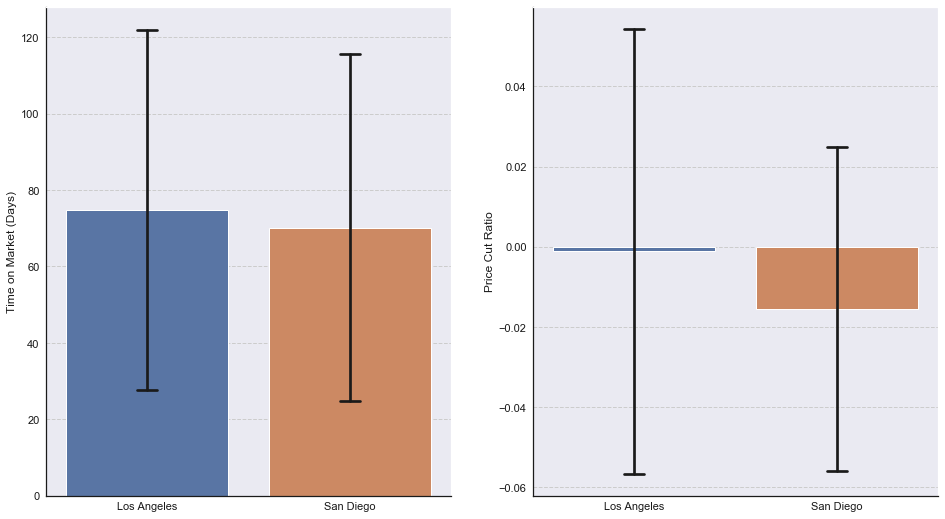

In [8]:
barplot(x='CountyOrParish', y=columns, data=mls_df, title=f'Population');

The distribution of days on the market and ratio of price cuts for houses sold over the past 5 years in LA and SD counties. The majority of the data located in the wider portions of the curves, and the extreme data points shown by the narrowing of the curves.

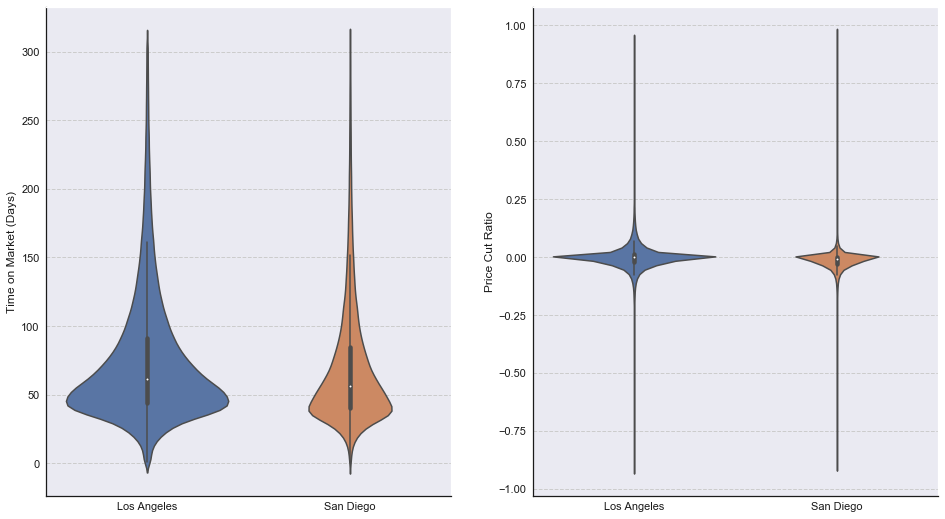

In [9]:
violinplot(x='CountyOrParish', y=columns, data=mls_df, title=f'Population');

### LA's On Market Analysis

Comparison of distribution of houses sold in LA within 60 days of being on market and after 60 days of being on market for price cut ratio.

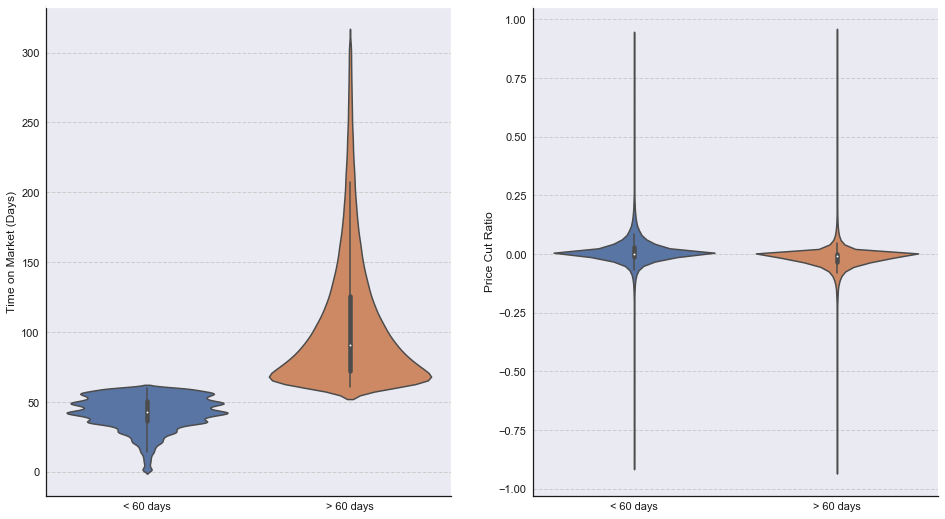

In [10]:
violinplot(x='SixtyDays', y=columns, order=['< 60 days','> 60 days'], data=LA);

### SD's On Market Analysis

Comparison of distribution of houses sold in LA within 60 days of being on market and after 60 days of being on market for price cut ratio.

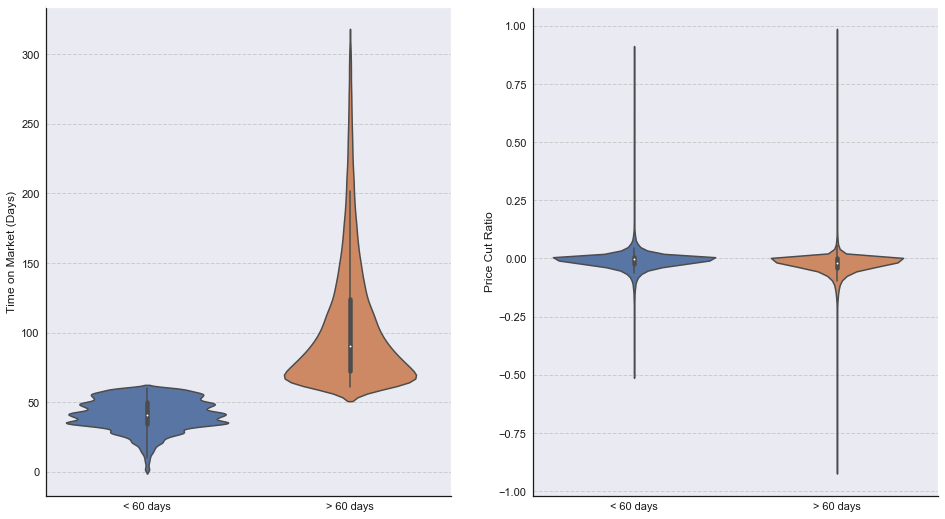

In [11]:
violinplot(x='SixtyDays', y=columns, order=['< 60 days','> 60 days'], data=SD);

**Bootstrapped Sample Means Distribution Plots**

In [12]:
from scipy import stats
def confidence_interval(sample, population):
    """
    sample = Series data type of sampled values
    """
    sample_mean = sample.mean()
    sample_size = len(sample)
    z_critical = stats.norm.sf(0.025)  # Get the z-critical value*
    print("z-critical value:")  # Check the z-critical value
    print(z_critical)
#     pop_stdev = population.std()  # Get the population standard deviation
    margin_of_error = z_critical * (sample.var() / np.sqrt(sample.count()))
#     confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return margin_of_error

In [13]:
print(confidence_interval(LA_means.OnMarketDays, LA.OnMarketDays))
print(confidence_interval(SD_means.OnMarketDays, SD.OnMarketDays))

z-critical value:
0.49002748180476197
0.09138802059064349
z-critical value:
0.49002748180476197
0.06262725135404554


In [14]:
print('With sample stdev')
print(confidence_interval(LA.OnMarketDays, LA.OnMarketDays))
print(confidence_interval(SD.OnMarketDays, SD.OnMarketDays))

With sample stdev
z-critical value:
0.49002748180476197
2.1724904039643613
z-critical value:
0.49002748180476197
2.8160172609872194


Due to large samples (200 bootstrapped sample means), assume t-test approximates z-test for mean differences.
$$ \text{H}_0 : \mu_1 - \mu_2 = 0$$

In [15]:
stats.ttest_ind_from_stats(mean1=LA_means.OnMarketDays.mean(),
                           mean2=SD_means.OnMarketDays.mean(),
                           std1=LA_means.OnMarketDays.std(),
                           std2=SD_means.OnMarketDays.std(),
                           nobs1=LA_means.OnMarketDays.count(),
                           nobs2=LA_means.OnMarketDays.count())

Ttest_indResult(statistic=30.351953719975832, pvalue=1.2925716340636268e-105)

Since p < 0.05, we can confidently say the population means are different.

z-critical value:
0.49002748180476197
z-critical value:
0.49002748180476197


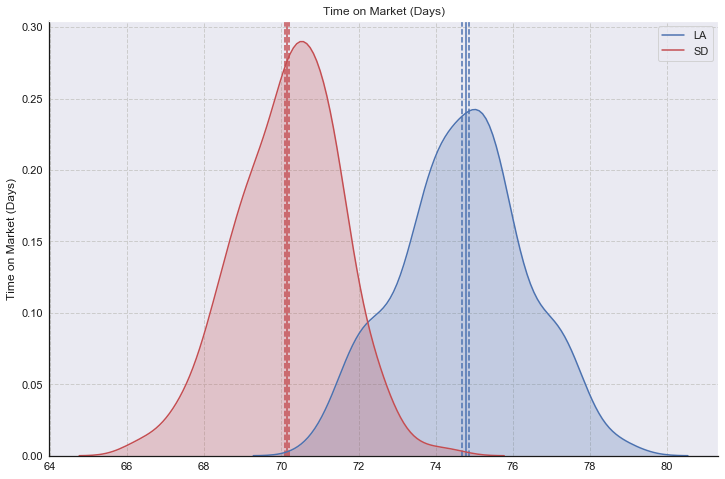

z-critical value:
0.49002748180476197
z-critical value:
0.49002748180476197


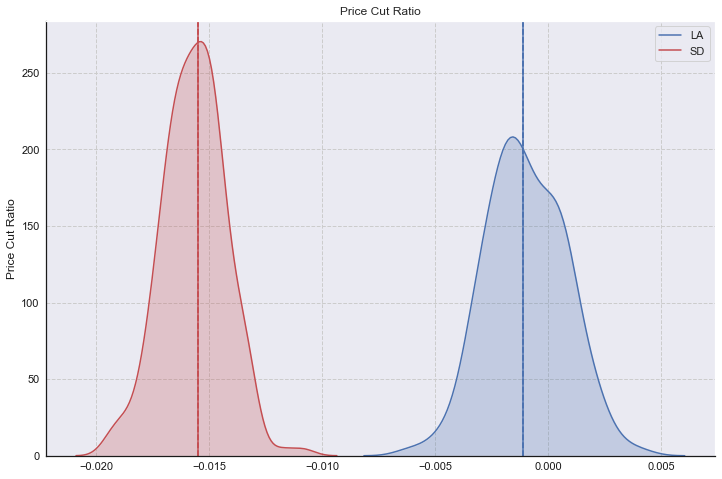

In [16]:
for col in columns:
     distplot(LA_means[col],SD_means[col], 'LA','SD', 
         (LA[col].mean(), confidence_interval(LA_means[col], LA[col])),
         (SD[col].mean(), confidence_interval(SD_means[col], SD[col])),
         bins=None, kde=True, figsize=(12,8), title=titles[col])

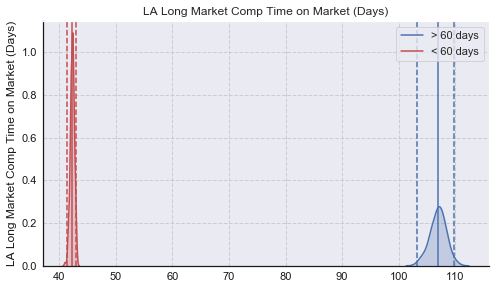

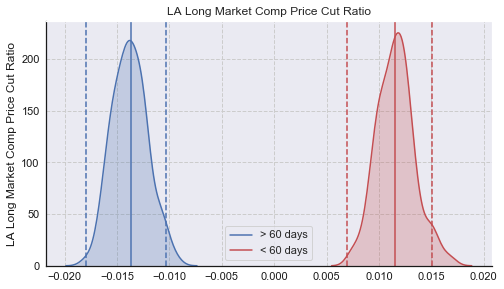

In [16]:
for col in columns:
    distplot(LA_LoM_means[col],LA_SoM_means[col], '> 60 days','< 60 days', 
         (LA_LongOnMarket[col].mean(), LA_LoM_means[col].std(ddof=1)),
         (LA_ShortOnMarket[col].mean(), LA_SoM_means[col].std(ddof=1)),
         bins=None, kde=True, title=f'LA Long Market Comp {titles[col]}')

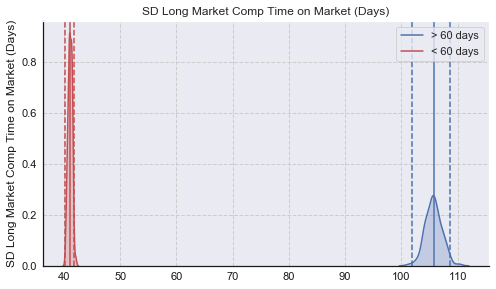

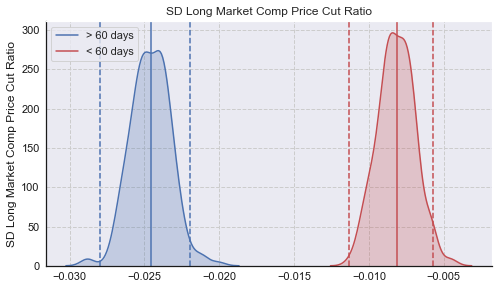

In [17]:
for col in columns:
    distplot(SD_LoM_means[col],SD_SoM_means[col], '> 60 days','< 60 days', 
         (SD_LoM_means[col].mean(), SD_LoM_means[col].std(ddof=1)),
         (SD_SoM_means[col].mean(), SD_SoM_means[col].std(ddof=1)),
         bins=None, kde=True, title=f'SD Long Market Comp {titles[col]}')

### A Look at sales as sampled weekly
Using Central Limit Theorem to test the means of weekly sales in LA and SD.

In [18]:
mls_months = mls_df.groupby(['CountyOrParish','CloseYearWeek']).agg('mean').reset_index()
# display(mls_months.head())
# display(mls_months.tail())

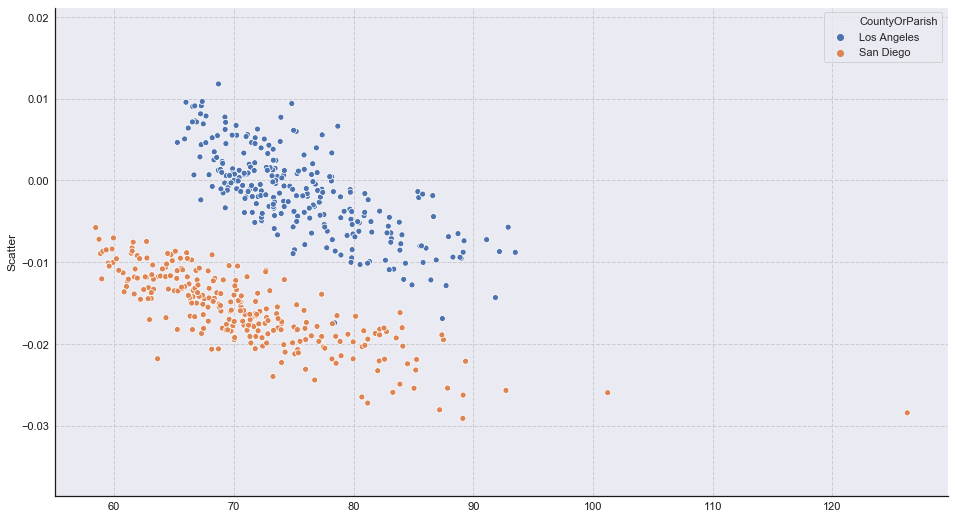

(<Figure size 1152x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12865cb38>)

In [19]:
scatterplot(x='OnMarketDays',y='PriceDiffRatio',hue='CountyOrParish',data=mls_months, title='Scatter')

### Welch's T-Test <a id="welch-ttest"></a>
Using the sample means distribution.

### Housing Market in LA vs SD County Means Comparison:

In [20]:
welch_test(LA_means, SD_means, columns)

OnMarketDays: p=3.956283569348807e-104; Null-hypothesis rejected.
PriceDiffRatio: p=1.0946060765103335e-262; Null-hypothesis rejected.


### LA County Housing Market :
Comparison of means on whether a house on market longer suffers price cut.

In [21]:
welch_test(LA_LoM_means.PriceDiffRatio, LA_SoM_means.PriceDiffRatio)

p=0.0; Null-hypothesis rejected.


### SD County Housing Market :
Comparison of means on whether a house on market longer suffers price cut.

In [22]:
welch_test(SD_LoM_means.PriceDiffRatio, SD_SoM_means.PriceDiffRatio) 

p=0.0; Null-hypothesis rejected.



### Results <a id="results"></a>
- Over the 5 years (January 2015 to December 2019), houses sold in Los Angeles County  stays on the market for longer 
than houses sold in San Diego County.
- Within the houses sold in Los Angeles County or houses sold in San Diego County, there's a difference in price cut 
(Closing Price lower than Listing Price) for houses sold within 60 days.